In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../..')

%matplotlib inline
sns.set()

In [2]:
import glob

In [9]:
no_kaf = "../../logs/darnn/ntsa-2019-01-03-11-08-41"
dense= "../../logs/dense/ntsa-2019-01-18-23-39-23-199179"
seq2seq = "../../logs/seq2seq/ntsa-2019-01-18-23-39-02-139100"
kaf_time = "../../logs/darnn/ntsa-2019-01-03-11-09-01"
kaf_input = "../../logs/darnn/ntsa-2019-01-03-11-09-36"
kaf_dual = "../../logs/darnn/ntsa-2019-01-03-11-09-58"

In [10]:
df_no_kaf = pd.read_csv(no_kaf + '/train/results.csv')
df_dense = pd.read_csv(dense + '/train/results.csv')
df_seq2seq = pd.read_csv(seq2seq + '/train/results.csv')
df_kaf_time = pd.read_csv(kaf_time + '/train/results.csv')
df_kaf_input = pd.read_csv(kaf_input + '/train/results.csv')
df_kaf_dual = pd.read_csv(kaf_dual + '/train/results.csv')

In [11]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

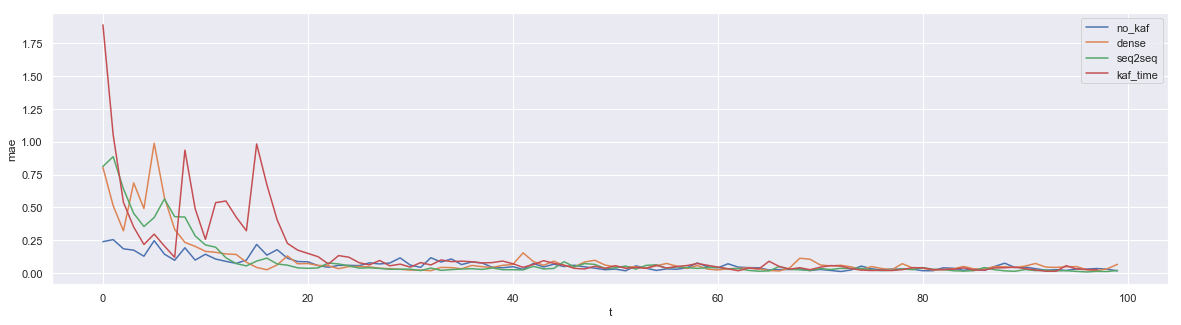

In [12]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','dense', 'seq2seq','kaf_time','kaf_input', 'kaf_dual'])

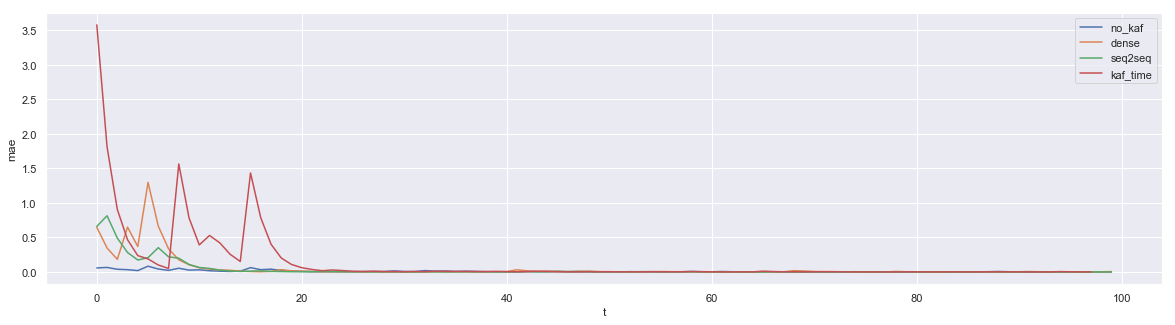

In [13]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','dense', 'seq2seq','kaf_time','kaf_input', 'kaf_dual'])

In [14]:
# no reg
rows = ['no_kaf','dense','seq2seq','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), 
                   df_dense.mean(axis=0),
                   df_seq2seq.mean(axis=0),
                   df_kaf_time.mean(axis=0), 
                   df_kaf_input.mean(axis=0), 
                   df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.062673,8.256538,0.009169,0.062673,0.121579,0.062673,15.728450
dense,0.192689,6.787159,0.091405,0.192689,0.337369,0.192689,71.614399
seq2seq,0.040564,2.147062,0.006983,0.040564,0.080232,0.040564,10.088965
kaf_time,0.092368,4.857836,0.046910,0.092368,0.171410,0.092368,20.478268
kaf_input,0.080666,7.455264,0.031956,0.080666,0.163963,0.080666,28.526254
kaf_dual,0.130796,5.905410,0.114548,0.130796,0.207238,0.130796,135.525623


In [15]:
header = table.index.tolist()

In [16]:
df_no_kaf = pd.read_csv(no_kaf + '/test/results.csv', names=header)
df_dense = pd.read_csv(dense + '/test/results.csv', names=header)
df_seq2seq = pd.read_csv(seq2seq + '/test/results.csv', names=header)
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', names=header)
df_kaf_input = pd.read_csv(kaf_input + '/test/results.csv', names=header)
df_kaf_dual = pd.read_csv(kaf_dual+ '/test/results.csv', names=header)

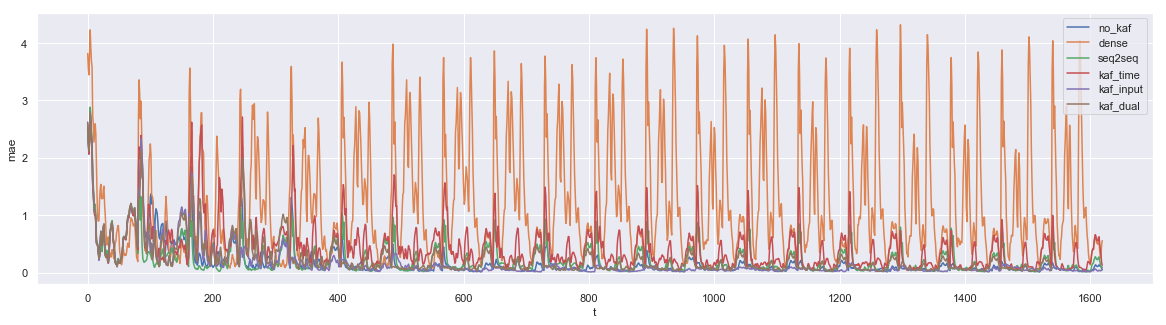

In [17]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_dense.loss.values))
ax.plot(smooth(df_seq2seq.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','dense', 'seq2seq','kaf_time','kaf_input', 'kaf_dual'])

In [18]:
# there is no regularization in no_kaf, dense, se2see the value in rmse is the smape!
table = pd.concat([df_no_kaf.mean(axis=0), 
                   df_dense.mean(axis=0),
                   df_seq2seq.mean(axis=0),
                   df_kaf_time.mean(axis=0), 
                   df_kaf_input.mean(axis=0), 
                   df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [19]:
# no reg
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.188730,7.508319,0.140844,0.188730,0.285661,0.188730,75.375308
dense,1.224584,8.519082,3.081657,1.224584,1.114768,1.224584,1136.363657
seq2seq,0.230772,2.463101,0.165590,0.230772,0.314466,0.230772,68.102988
kaf_time,0.426515,6.485960,0.405903,0.426515,0.642095,0.426515,165.480158
kaf_input,0.161911,5.506075,0.124318,0.161911,0.258173,0.161911,44.736452
kaf_dual,0.232702,4.658819,0.168228,0.232702,0.355513,0.232702,66.977061


In [20]:
def last_path(base_path):
    paths = glob.glob(base_path + '/report/*.csv')
    idxs = list(map(lambda x: int(x.split('/')[-1].split('_')[0]), paths))
    idx = max(idxs)
    paths
    return base_path + '/report/' + ''.join([str(idx), '_', 'report.csv'])

In [21]:
df_no_kaf = pd.read_csv(last_path(no_kaf), index_col=0)
df_dense = pd.read_csv(last_path(dense), index_col=0)
df_seq2seq = pd.read_csv(last_path(seq2seq), index_col=0)
df_kaf_time = pd.read_csv(last_path(kaf_time), index_col=0)
df_kaf_input = pd.read_csv(last_path(kaf_input), index_col=0)
df_kaf_dual = pd.read_csv(last_path(kaf_dual), index_col=0)

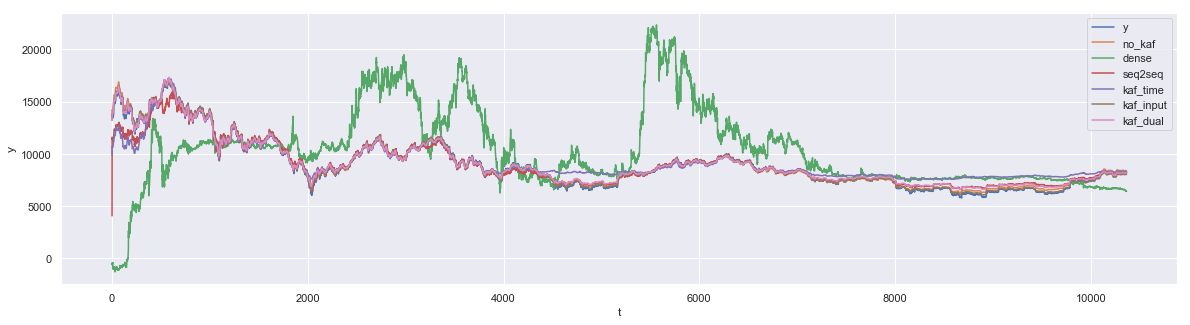

In [22]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_dense.y_hat.values)
ax.plot(df_seq2seq.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['y','no_kaf','dense', 'seq2seq','kaf_time','kaf_input', 'kaf_dual'])

In [23]:
from ntsa.utils.misc import regr_metrics

In [24]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_dense = df_dense.y_hat.values
y_seq2seq = df_seq2seq.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [25]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_dense).values()),
list(regr_metrics(y, y_seq2seq).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [26]:
# no reg
pd.DataFrame(np.array(metrics), index=['no_kaf', 'dense','seq2seq','time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,3.937163e+04,150.177864,0.018060,1.786758
dense,1.898172e+07,2913.788104,0.277545,74.890407
seq2seq,2.993456e+05,296.552627,0.033226,3.334569
time,7.511235e+05,560.388398,0.068181,6.521309
input,1.916935e+04,99.288514,0.011058,1.100280
dual,7.620137e+04,203.590047,0.026158,2.552274
